# <center> <B> DA4210 - Text Analytics </B> </center>

### <center> <B> Assignment 01 </B> </center>

<b>Name:</b> M. W. S. A. U. SILVA <br>
<b>Index No:</b> 206121X

In [1]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
# import libraries

import os
import warnings

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay)

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.layers import Input, Embedding, Bidirectional, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


#### <b>2. <u>Data Collection</u></b>

In [4]:
# load dataset

fake = pd.read_csv("/content/gdrive/MyDrive/7_Semester/Text_Analytics/sanduni/data/Fake.csv")
true = pd.read_csv("/content/gdrive/MyDrive/7_Semester/Text_Analytics/sanduni/data/True.csv")

In [5]:
# give the fake news lable 0

fake['lable'] = 0
fake.head()

,title,text,subject,date,lable
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [6]:
# give the true news lable 1

true['lable'] = 1
true.head()

,title,text,subject,date,lable
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [7]:
# delete unneeded columns

fake.drop(columns=["title","date","subject"], inplace = True)
true.drop(columns=["title","date","subject"], inplace = True)

In [8]:
fake.head()

,text,lable
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0


In [9]:
true.head()

,text,lable
0,WASHINGTON (Reuters) - The head of a conservat...,1
1,WASHINGTON (Reuters) - Transgender people will...,1
2,WASHINGTON (Reuters) - The special counsel inv...,1
3,WASHINGTON (Reuters) - Trump campaign adviser ...,1
4,SEATTLE/WASHINGTON (Reuters) - President Donal...,1


In [10]:
# add the two dataframe in one dataframe

news = pd.concat([fake, true], ignore_index=True)
news

,text,lable
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0
...,...,...
44893,BRUSSELS (Reuters) - NATO allies on Tuesday we...,1
44894,"LONDON (Reuters) - LexisNexis, a provider of l...",1
44895,MINSK (Reuters) - In the shadow of disused Sov...,1
44896,MOSCOW (Reuters) - Vatican Secretary of State ...,1


Exploratory Visualizations

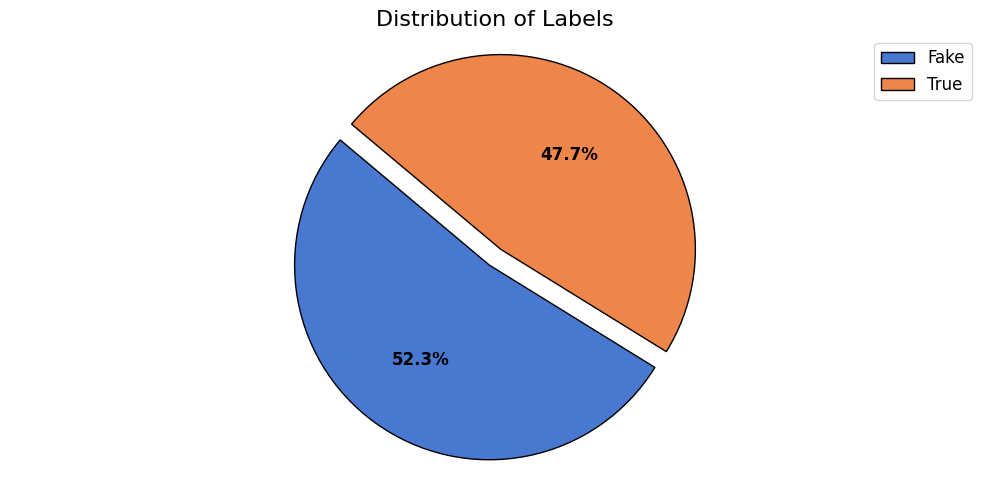

In [11]:
# lable distribution

fig, ax = plt.subplots(figsize = (10, 5))

labels = ['Fake', 'True']
sizes = news['lable'].value_counts().values
colors = sns.color_palette('muted')

wedges, texts, autotexts = ax.pie(sizes, colors = colors,
                                  autopct = '%1.1f%%', startangle = 140,
                                  explode = (0.1, 0), wedgeprops = dict(edgecolor = 'black'))

ax.set_title('Distribution of Labels', fontsize = 16)
ax.axis('equal')
ax.legend(wedges, labels, loc = "best", fontsize = 12)

for text in texts:
    text.set_fontsize(12)
    text.set_fontweight('bold')

for autotext in autotexts:
    autotext.set_fontsize(12)
    autotext.set_fontweight('bold')

plt.tight_layout()
plt.show()

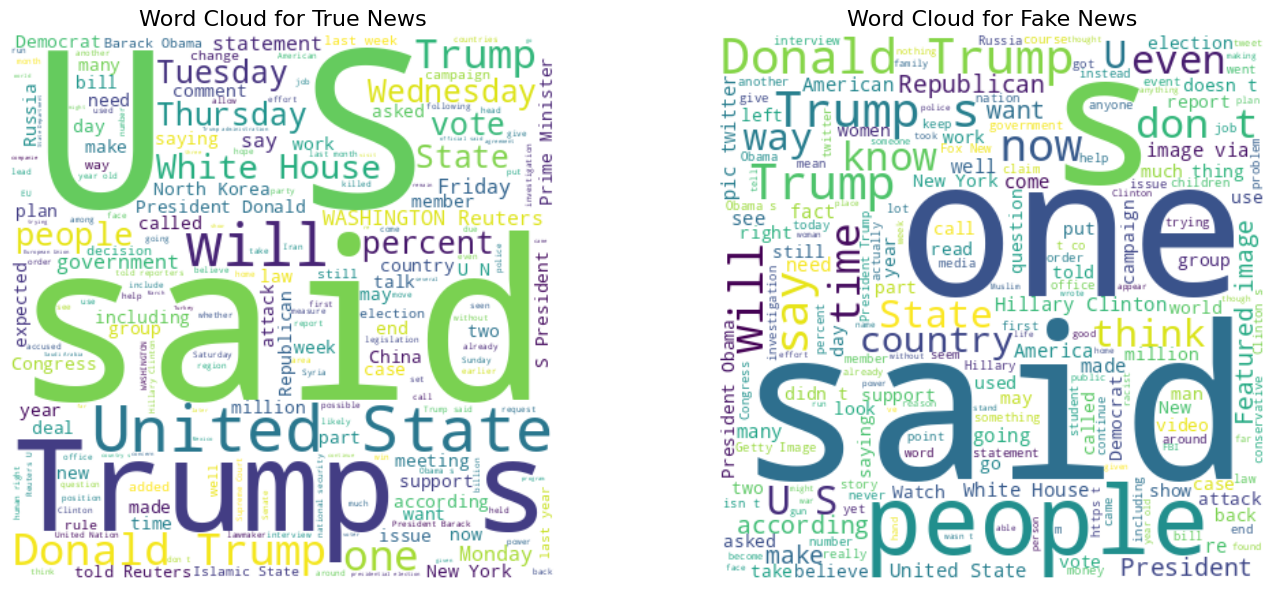

In [12]:
# word cloud

true_news_data = news[news['lable'] == 1]['text'].values
fake_news_data = news[news['lable'] == 0]['text'].values

all_true_news = ' '.join(true_news_data)
all_fake_news = ' '.join(fake_news_data)

wordcloud_true = WordCloud(width = 400, height = 400,
                          background_color = 'white').generate(all_true_news)
wordcloud_fake = WordCloud(width = 400, height = 400,
                           background_color = 'white').generate(all_fake_news)

plt.figure(figsize = (15, 6))

# true news

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_true, interpolation = 'bilinear')
plt.title('Word Cloud for True News', fontsize = 16)
plt.axis('off')

# fake news

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_fake, interpolation = 'bilinear')
plt.title('Word Cloud for Fake News', fontsize = 16)
plt.axis('off')

plt.tight_layout()
plt.show()

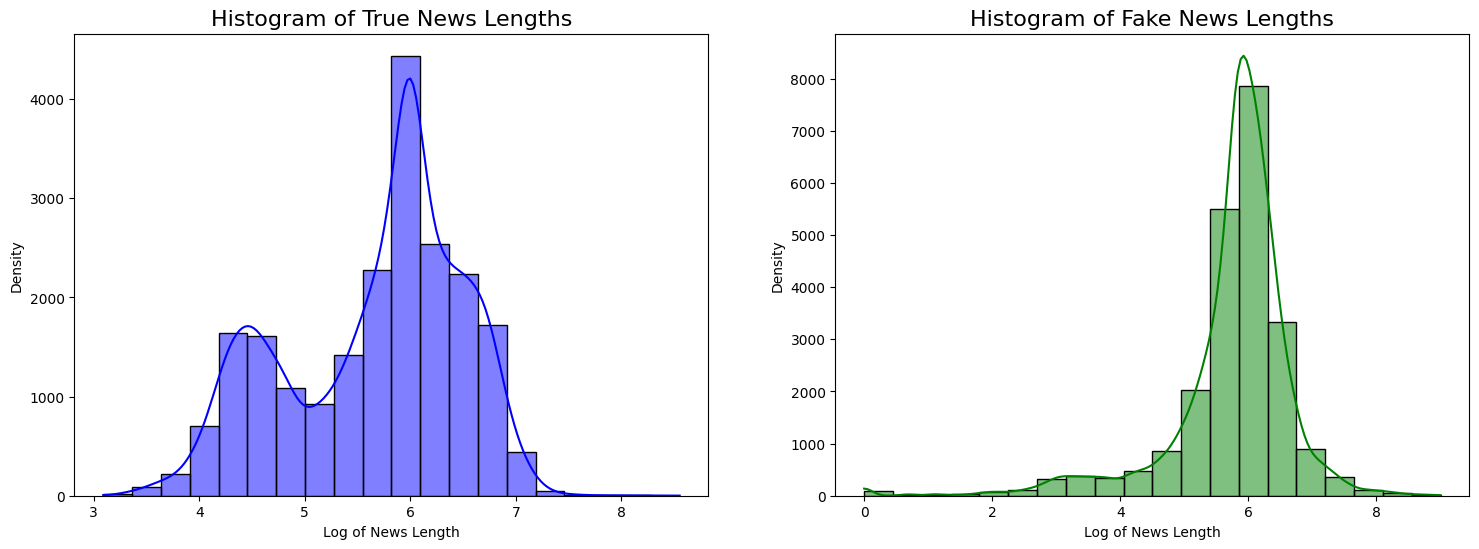

In [13]:
# news length distribution

fake_lengths = np.log([len(news.split()) for news in news[news['lable'] == 0]['text']])
true_lengths = np.log([len(news.split()) for news in news[news['lable'] == 1]['text']])

fig, axes = plt.subplots(1, 2, figsize = (18, 6))

# true news

sns.histplot(true_lengths, bins = 20, color = 'blue', kde = True, ax = axes[0])
axes[0].set_title('Histogram of True News Lengths', fontsize = 16)
axes[0].set_xlabel('Log of News Length')
axes[0].set_ylabel('Density')

# fake news

sns.histplot(fake_lengths, bins = 20, color = 'green', kde = True, ax = axes[1])
axes[1].set_title('Histogram of Fake News Lengths', fontsize = 16)
axes[1].set_xlabel('Log of News Length')
axes[1].set_ylabel('Density')

plt.show()

#### <b>3. <u>Data Preprocessing</u></b>

In [14]:
# check for cleaning data

news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    44898 non-null  object
 1   lable   44898 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 701.7+ KB


In [15]:
news.isnull().sum()

text     0
lable    0
dtype: int64

In [16]:
news.duplicated().sum()

6251

In [17]:
# remove duplicates

news.drop_duplicates(inplace=True)
news.duplicated().sum()

0

In [18]:
# Preprocessing ---> tokenize/ stopwords/ lemmatizer

import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import numpy as np

In [20]:
def process_text(text):

    # Remove extra white space from text
    text = re.sub(r'\s+', ' ', text, flags=re.I)

    # Remove all the special characters from text
    text = re.sub(r'\W', ' ', str(text))

    # Remove all single characters from text
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)

    # Remove any character that isn't alphabetical
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Lowercasing
    text = text.lower()

    #Tokenization
    words = word_tokenize(text)

    #Lemmatization
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]

    # Removi stopwords
    stop_words = set(stopwords.words("english"))
    Words = [word for word in words if word not in stop_words]

    # Filter out words from the list 'Words' with a length less than or equal to 3 characters
    Words = [word for word in Words if len(word) > 3]

    # Obtain unique elements from the list 'Words' along with the indices of their first occurrences
    indices = np.unique(Words, return_index=True)[1]
    # Rearrange the original list 'Words' based on the sorted indices of unique elements
    # Preserve the original order of elements while removing duplicates
    cleaned_text = np.array(Words)[np.sort(indices)].tolist()

    return cleaned_text

In [19]:
nltk.download('wordnet', "/kaggle/working/nltk_data/")
nltk.download('omw-1.4', "/kaggle/working/nltk_data/")
! unzip /kaggle/working/nltk_data/corpora/wordnet.zip -d /kaggle/working/nltk_data/corpora
! unzip /kaggle/working/nltk_data/corpora/omw-1.4.zip -d /kaggle/working/nltk_data/corpora
nltk.data.path.append("/kaggle/working/nltk_data/")

[nltk_data] Downloading package wordnet to
[nltk_data]     /kaggle/working/nltk_data/...
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /kaggle/working/nltk_data/...


Archive:  /kaggle/working/nltk_data/corpora/wordnet.zip
   creating: /kaggle/working/nltk_data/corpora/wordnet/
  inflating: /kaggle/working/nltk_data/corpora/wordnet/lexnames  
  inflating: /kaggle/working/nltk_data/corpora/wordnet/data.verb  
  inflating: /kaggle/working/nltk_data/corpora/wordnet/index.adv  
  inflating: /kaggle/working/nltk_data/corpora/wordnet/adv.exc  
  inflating: /kaggle/working/nltk_data/corpora/wordnet/index.verb  
  inflating: /kaggle/working/nltk_data/corpora/wordnet/cntlist.rev  
  inflating: /kaggle/working/nltk_data/corpora/wordnet/data.adj  
  inflating: /kaggle/working/nltk_data/corpora/wordnet/index.adj  
  inflating: /kaggle/working/nltk_data/corpora/wordnet/LICENSE  
  inflating: /kaggle/working/nltk_data/corpora/wordnet/citation.bib  
  inflating: /kaggle/working/nltk_data/corpora/wordnet/noun.exc  
  inflating: /kaggle/working/nltk_data/corpora/wordnet/verb.exc  
  inflating: /kaggle/working/nltk_data/corpora/wordnet/README  
  inflating: /kaggle/w

In [21]:
x = news.drop('lable', axis=1)
y = news.lable

In [22]:
# make the columns of the text in the dataframe to list

texts = list(x['text'])

In [24]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [25]:
# clean the texts in the list
from tqdm.autonotebook import tqdm

cleaned_text = [process_text(text) for text in tqdm(texts)]

  0%|          | 0/38647 [00:00<?, ?it/s]

In [26]:
print(cleaned_text[:10])

[['donald', 'trump', 'wish', 'american', 'happy', 'year', 'leave', 'instead', 'give', 'shout', 'enemy', 'hater', 'dishonest', 'fake', 'news', 'medium', 'former', 'reality', 'show', 'star', 'country', 'rapidly', 'grows', 'stronger', 'smarter', 'want', 'friend', 'supporter', 'even', 'healthy', 'president', 'angry', 'pant', 'tweeted', 'great', 'america', 'realdonaldtrump', 'december', 'tweet', 'went', 'welll', 'expect', 'kind', 'sends', 'greeting', 'like', 'despicable', 'petty', 'infantile', 'gibberish', 'lack', 'decency', 'allow', 'rise', 'gutter', 'long', 'enough', 'citizen', 'bishop', 'talbert', 'swan', 'talbertswan', 'calvin', 'calvinstowell', 'impeachment', 'would', 'make', 'also', 'accept', 'regaining', 'control', 'congress', 'miranda', 'yaver', 'mirandayaver', 'hear', 'talk', 'include', 'many', 'people', 'hate', 'wonder', 'alan', 'sandoval', 'alansandoval', 'word', 'marlene', 'koren', 'pollitt', 'korencarpenter', 'including', 'fought', 'lost', 'badly', 'know', 'love', 'nothing', 'd

#### <b>4. <u>Text Analytics</u></b>

In [27]:
# Split the texts and the lables of the fake and real news to train & test datasets

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(cleaned_text, y, test_size=0.2, random_state=0)

In [28]:
# tokenize all the words in the data and transform them to be sequsnces

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train)
word_idx = tokenizer.word_index  # Corrected syntax for accessing word index
v = len(word_idx) + 1
print("the size of vocab =", v)  # Corrected spacing
x_train = tokenizer.texts_to_sequences(x_train)
x_test = tokenizer.texts_to_sequences(x_test)

max_length = max(len(sequence) for sequence in x_train)
# pad the sequences

train_seq = pad_sequences(x_train, maxlen = max_length, padding = 'post', truncating = 'post')
test_seq = pad_sequences(x_test, maxlen = max_length, padding = 'post', truncating = 'post')

the size of vocab = 91605


In [29]:
#!wget "https://nlp.stanford.edu/data/glove.6B.zip"

In [42]:
!unzip "/content/gdrive/MyDrive/7_Semester/Text_Analytics/sanduni/glove.6B.zip"

Archive:  /content/gdrive/MyDrive/7_Semester/Text_Analytics/sanduni/glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


Developing classification model

In [46]:
glove_emb = "glove.6B.300d.txt"

epochs = 5
lr = 1e-3

embedding_dim = 300
embeddings_index = {}

f = open(glove_emb, encoding="utf-8")
for line in f:
    values = line.split()
    word = value = values[0]
    coefs = np.asarray(values[1:], dtype = 'float32')
    embeddings_index[word] = coefs
f.close()

embedding_matrix = np.zeros((v, embedding_dim))
for word, i in tokenizer.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
       embedding_matrix[i] = embedding_vector

In [47]:
# define the model

model = Sequential([
    Input(shape = (max_length,)),
    Embedding(v, embedding_dim, input_length = max_length, trainable = False),

    Bidirectional(LSTM(32, return_sequences = True)),
    Bidirectional(LSTM(16)),
    Dropout(0.2),

    Dense(32, activation = 'relu'),
    Dropout(0.5),

    Dense(1, activation = 'sigmoid')
])

# set the embedding weights

model.layers[0].set_weights([embedding_matrix])

# compile the model

model.compile(optimizer = Adam(learning_rate = lr),
              loss = BinaryCrossentropy(), metrics = ['accuracy'])

# print model summary

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 2051, 300)         27481500  
                                                                 
 bidirectional_2 (Bidirecti  (None, 2051, 64)          85248     
 onal)                                                           
                                                                 
 bidirectional_3 (Bidirecti  (None, 32)                10368     
 onal)                                                           
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dropout_3 (Dropout)         (None, 32)               

In [48]:
%%time

# define callbacks

model_es = EarlyStopping(monitor = 'val_loss', mode = 'min', patience = 2, restore_best_weights = True)
model_rlr = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.2, patience = 1, mode = 'min')

# train the model

history = model.fit(train_seq, y_train, epochs = epochs,
                    validation_split = 0.2, callbacks = [model_es, model_rlr])

Epoch 1/5
773/773 [==============================] - 220s 267ms/step - loss: 0.0414 - accuracy: 0.9906 - val_loss: 0.0104 - val_accuracy: 0.9984 - lr: 0.0010
Epoch 2/5
773/773 [==============================] - 204s 264ms/step - loss: 0.0124 - accuracy: 0.9985 - val_loss: 0.0059 - val_accuracy: 0.9985 - lr: 0.0010
Epoch 3/5
773/773 [==============================] - 221s 286ms/step - loss: 0.0082 - accuracy: 0.9985 - val_loss: 0.0062 - val_accuracy: 0.9985 - lr: 0.0010
Epoch 4/5
773/773 [==============================] - 221s 285ms/step - loss: 0.0052 - accuracy: 0.9992 - val_loss: 0.0046 - val_accuracy: 0.9989 - lr: 2.0000e-04
Epoch 5/5
773/773 [==============================] - 219s 283ms/step - loss: 0.0044 - accuracy: 0.9992 - val_loss: 0.0050 - val_accuracy: 0.9987 - lr: 2.0000e-04
CPU times: user 16min 48s, sys: 7.71 s, total: 16min 55s
Wall time: 18min 34s


In [49]:
# get predictions

y_pred_train = np.round(model.predict(train_seq, verbose = 0))
y_pred_test = np.round(model.predict(test_seq, verbose = 0))

Evaluating classifier

In [50]:
# display the accuracy

print(f'Train Accuracy : {accuracy_score(y_train, y_pred_train) * 100:.2f} %')
print(f'Test Accuracy  : {accuracy_score(y_test, y_pred_test) * 100:.2f} %')

Train Accuracy : 99.94 %
Test Accuracy  : 99.92 %


In [51]:
# display classification report

print(f'Classification Report (Train) : \n\n{classification_report(y_train, y_pred_train)}')
print('-----------------------------------------------------')
print(f'\nClassification Report (Test)  : \n\n{classification_report(y_test, y_pred_test)}')

Classification Report (Train) : 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13995
           1       1.00      1.00      1.00     16922

    accuracy                           1.00     30917
   macro avg       1.00      1.00      1.00     30917
weighted avg       1.00      1.00      1.00     30917

-----------------------------------------------------

Classification Report (Test)  : 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3460
           1       1.00      1.00      1.00      4270

    accuracy                           1.00      7730
   macro avg       1.00      1.00      1.00      7730
weighted avg       1.00      1.00      1.00      7730



Evaluation visualizaion

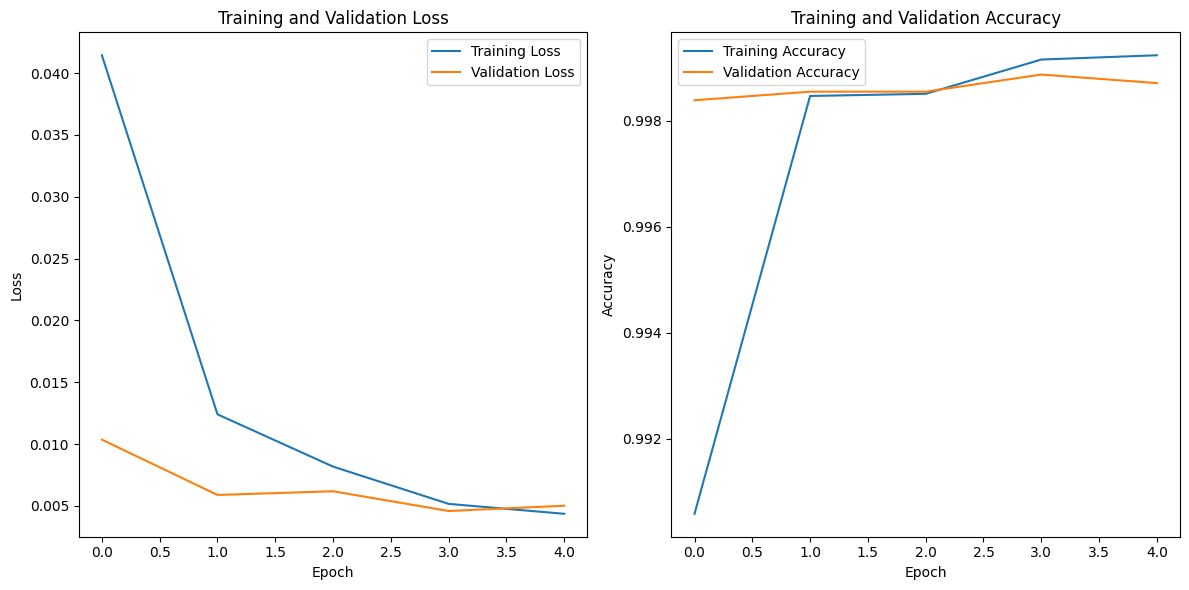

In [52]:
# Accuracy and loss curve

plt.figure(figsize = (12, 6))

# loss plot

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# accuracy plot

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label = 'Training Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

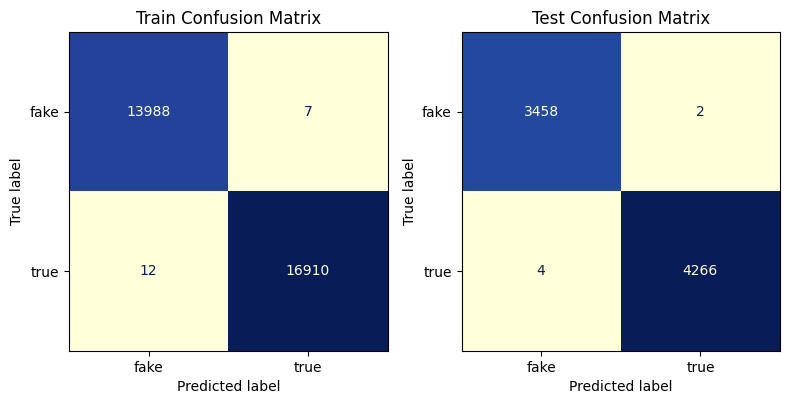

In [53]:
# Confusion matrix

train_matrix = confusion_matrix(y_train, y_pred_train)
test_matrix = confusion_matrix(y_test, y_pred_test)

class_labels = ['fake', 'true']

disp_train = ConfusionMatrixDisplay(confusion_matrix = train_matrix, display_labels = class_labels)
disp_test = ConfusionMatrixDisplay(confusion_matrix = test_matrix, display_labels = class_labels)

fig, axs = plt.subplots(1, 2, figsize = (8, 12))

# train

disp_train.plot(ax = axs[0], cmap = 'YlGnBu', colorbar = False)
axs[0].set_title('Train Confusion Matrix')

# test

disp_test.plot(ax = axs[1], cmap = 'YlGnBu', colorbar = False)
axs[1].set_title('Test Confusion Matrix')

plt.tight_layout()
plt.show()